In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes # Przykładowy zbiór
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Wczytujemy dane (uproszczony przykład klasyfikacji)
from sklearn.datasets import make_classification
X_raw, y_raw = make_classification(n_samples=1000, n_features=5, n_informative=3, n_redundant=2, random_state=42)
df = pd.DataFrame(X_raw, columns=['Cecha_1', 'Cecha_2', 'Cecha_3', 'Cecha_4', 'Cecha_5'])
df['Target'] = y_raw

df.head()

,Cecha_1,Cecha_2,Cecha_3,Cecha_4,Cecha_5,Target
0,-0.065300,-0.717214,0.393952,-0.934473,1.681514,0
1,0.567015,-0.044606,1.612851,-1.350174,2.488878,0
2,-0.247215,-0.650569,-0.743500,-1.214190,0.841110,0
3,1.145870,0.974224,1.562506,-2.277010,2.276521,1
4,0.599605,-0.427545,2.374472,-1.503510,3.604959,0


In [3]:
print(f"Kształt danych: {df.shape}")
print("\nBrakujące wartości:")
print(df.isna().sum().sum()) # Suma wszystkich braków w tabeli

# Statystyki dla kilku pierwszych kolumn
df.iloc[:, :5].describe()

Kształt danych: (1000, 6)

Brakujące wartości:
0


,Cecha_1,Cecha_2,Cecha_3,Cecha_4,Cecha_5
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.195463,0.009486,0.482060,-0.501864,0.799633
std,0.670451,1.198626,1.284559,1.249826,1.690660
min,-2.696759,-3.950596,-3.778978,-3.837231,-5.639529
25%,-0.163177,-0.953959,-0.199755,-1.311925,-0.209345
50%,0.362265,0.207400,0.620635,-0.725516,0.893711
75%,0.610046,0.956974,1.371884,0.268259,1.967214
max,1.852260,2.860860,3.841188,4.619524,5.585086


Pierwsze 5 wierszy:
    Cecha_1   Cecha_2   Cecha_3   Cecha_4   Cecha_5  Target
0 -0.065300 -0.717214  0.393952 -0.934473  1.681514       0
1  0.567015 -0.044606  1.612851 -1.350174  2.488878       0
2 -0.247215 -0.650569 -0.743500 -1.214190  0.841110       0
3  1.145870  0.974224  1.562506 -2.277010  2.276521       1
4  0.599605 -0.427545  2.374472 -1.503510  3.604959       0

Braki w danych: 0


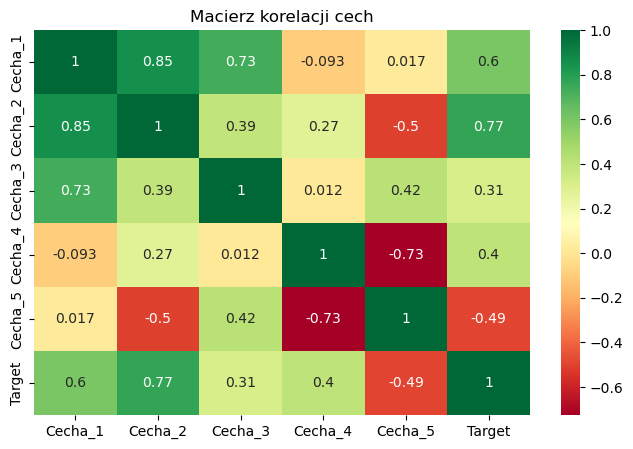

In [6]:
print("Pierwsze 5 wierszy:")
print(df.head())
print("\nBraki w danych:", df.isna().sum().sum())

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.title("Macierz korelacji cech")
plt.show()

In [10]:
print("Uruchamiam model...")
model = LogisticRegression()
model.fit(X_train, y_train) # Tutaj model się uczy

Uruchamiam model...


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
corr = df.corr(numeric_only=True)
corr

,Cecha_1,Cecha_2,Cecha_3,Cecha_4,Cecha_5,Target
Cecha_1,1.000000,0.854093,0.730308,-0.092882,0.016671,0.602125
Cecha_2,0.854093,1.000000,0.392845,0.272253,-0.504579,0.768746
Cecha_3,0.730308,0.392845,1.000000,0.011629,0.419333,0.314533
Cecha_4,-0.092882,0.272253,0.011629,1.000000,-0.726063,0.404344
Cecha_5,0.016671,-0.504579,0.419333,-0.726063,1.000000,-0.490176
Target,0.602125,0.768746,0.314533,0.404344,-0.490176,1.000000


In [12]:
data = df.copy()
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].median())
cat_cols = data.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    data[col] = data[col].fillna('brak_danych')

NameError: name 'numeric_cols' is not defined

In [13]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,Cecha_1,Cecha_2,Cecha_3,Cecha_4,Cecha_5,Target
0,-0.065300,-0.717214,0.393952,-0.934473,1.681514,0
1,0.567015,-0.044606,1.612851,-1.350174,2.488878,0
2,-0.247215,-0.650569,-0.743500,-1.214190,0.841110,0
3,1.145870,0.974224,1.562506,-2.277010,2.276521,1
4,0.599605,-0.427545,2.374472,-1.503510,3.604959,0


In [ ]:
X = data_encoded.drop('AverageTemperature', axis=1)
y = (data_encoded['AverageTemperatureUncertainty'] >
     data_encoded['AverageTemperatureUncertainty'].median()).astype(int)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse, mae

In [14]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
clf = LogisticRegression(max_iter=1000)

clf.fit(X_train_clf, y_train_clf)

y_pred_clf = clf.predict(X_test_clf)

acc = accuracy_score(y_test_clf, y_pred_clf)
cm = confusion_matrix(y_test_clf, y_pred_clf)
acc, cm

(0.925,
 array([[88,  6],
        [ 9, 97]]))